<a href="https://colab.research.google.com/github/ninadcpa/DSC630/blob/main/Week1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1 Assignment

@author - Ninad Patkhedkar

In [1]:
# This code is written for mounting code folder checked out from github on google drive
# All assignment code will be maintained inside folder "DSC550"

from google.colab import drive
import sys
import os

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DSC630')
os.chdir('/content/drive/MyDrive/Colab Notebooks/DSC630')

Mounted at /content/drive


1. Import, Plot, Summarize, and Save Data
Using the US Bureau of Labor Statistics data, choose a dataset that interests you. Then generate summary statistics for 2 variables, plot some of the features (e.g., histograms, box plots, density plots, etc.) of several variables, and save the data locally as CSV files.

I mostly found only TimeSeries datasetes on BLS site with only one feature/variable. I was looking for dataset with multiple variables.

I downloaded current umemployment rate csv file from BLS site. - COVID dashboard page

https://beta.bls.gov/covid-dashboard/home.htm

and stored that data locally on Google Drive at /content/drive/MyDrive/Colab Notebooks/DSC630.

In [2]:
# Reading csv file and loading data into dataframe
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

pd.set_option("display.precision", 2)
# Substitute values used for missing values in dataset
missing_values = ["n/a", "na", "--",""]
# Load the data in pandas dataframe with missing values set to NaN
df = pd.read_csv('Civil_unemployment_rate.csv',na_values = missing_values)

In [25]:
# Check the features in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       80 non-null     object 
 1   Total                      80 non-null     float64
 2   Men, 20 years and over     80 non-null     float64
 3   Women, 20 years and over   80 non-null     float64
 4   16 to 19 years old         80 non-null     float64
 5   White                      80 non-null     float64
 6   Black or African American  80 non-null     float64
 7   Asian                      80 non-null     float64
 8   Hispanic or Latino         80 non-null     float64
 9   Unnamed: 9                 0 non-null      float64
dtypes: float64(9), object(1)
memory usage: 6.4+ KB


In [5]:
df.sample(5)

,Date,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino,Unnamed: 9
57,Oct 2019,3.6,3.3,3.2,12.6,3.3,5.6,2.9,4.2,NaN
41,Jun 2018,4.0,3.7,3.7,11.2,3.5,6.5,3.3,4.6,NaN
53,Jun 2019,3.6,3.3,3.3,11.4,3.3,6.0,2.2,4.3,NaN
58,Nov 2019,3.6,3.2,3.3,12.5,3.3,5.7,2.6,4.3,NaN
55,Aug 2019,3.7,3.4,3.3,12.4,3.4,5.2,2.8,4.2,NaN


Lets generate Summary Statistics for 2 variables
1. White
2. Asian 

In [7]:
df[['White','Asian']].describe()

,White,Asian
count,80.00,80.00
mean,4.53,4.35
std,1.87,2.62
min,3.00,2.20
25%,3.50,3.00
50%,4.20,3.60
75%,4.70,4.10
max,14.10,14.90


Lets plot Histogram for same 2 variables.

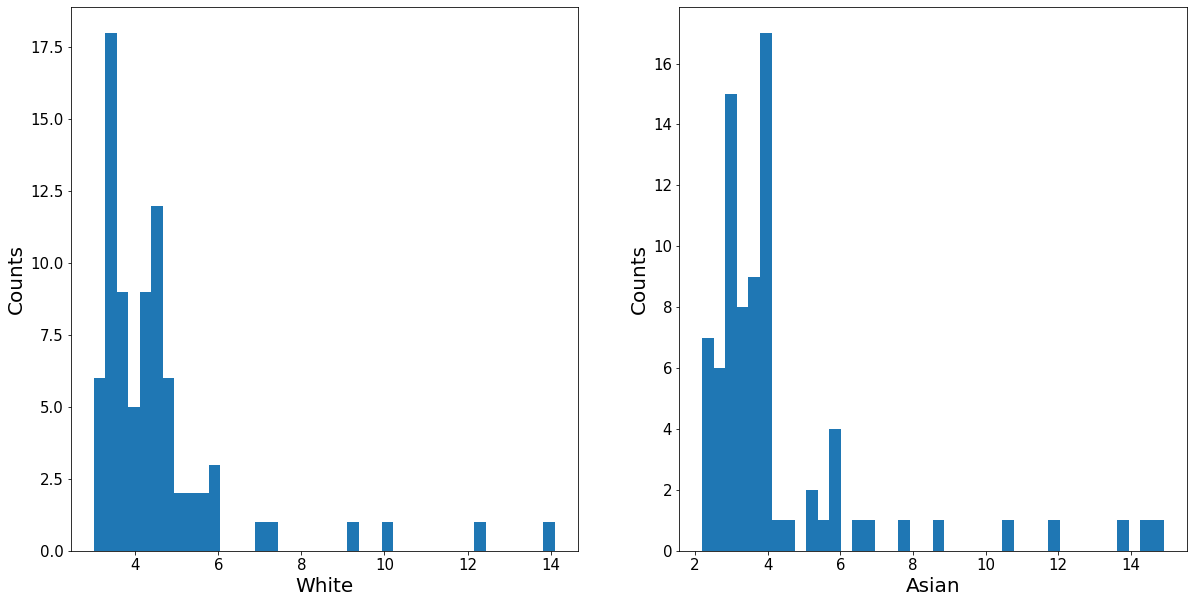

In [9]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Specify the features of interest
num_features = ['White','Asian']

xaxes = num_features
yaxes = ['Counts', 'Counts']

# draw histograms
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

Histograms doesn't have normal curve. Both histograms are rightly skewed. It means though majority of records have values in the range 2 to 6, there are some records with higher values.

Now lets plot Boxplots to check any outliers

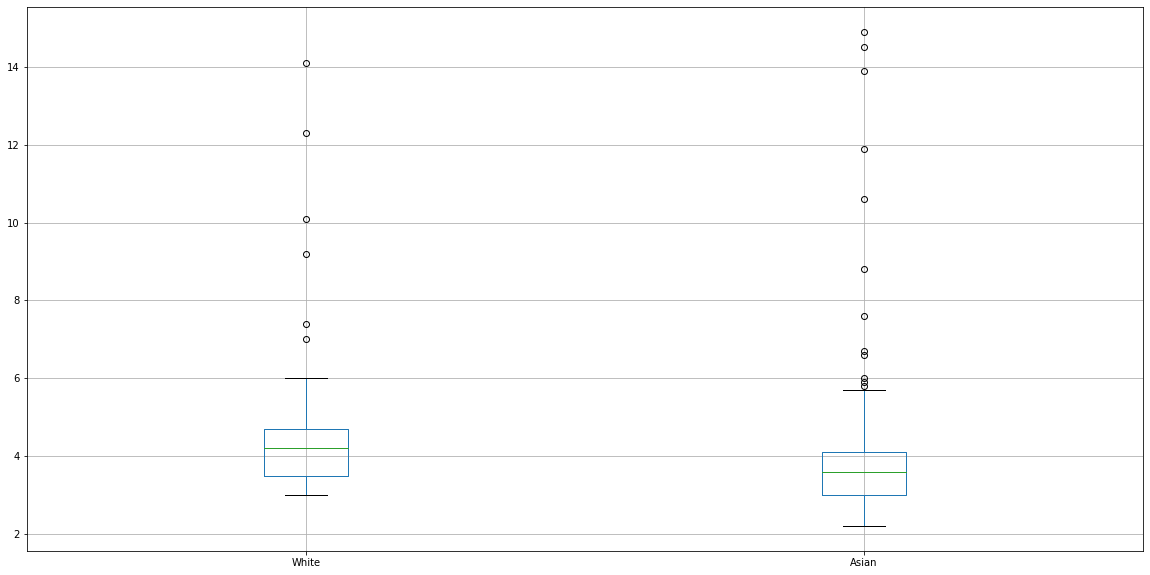

In [10]:
df[['White','Asian']].boxplot()

Boxplot shows there are number of outliers for unemployment % for White and Asian population. 

Now lets plot Density plot. I will use sns library for denisty plot.

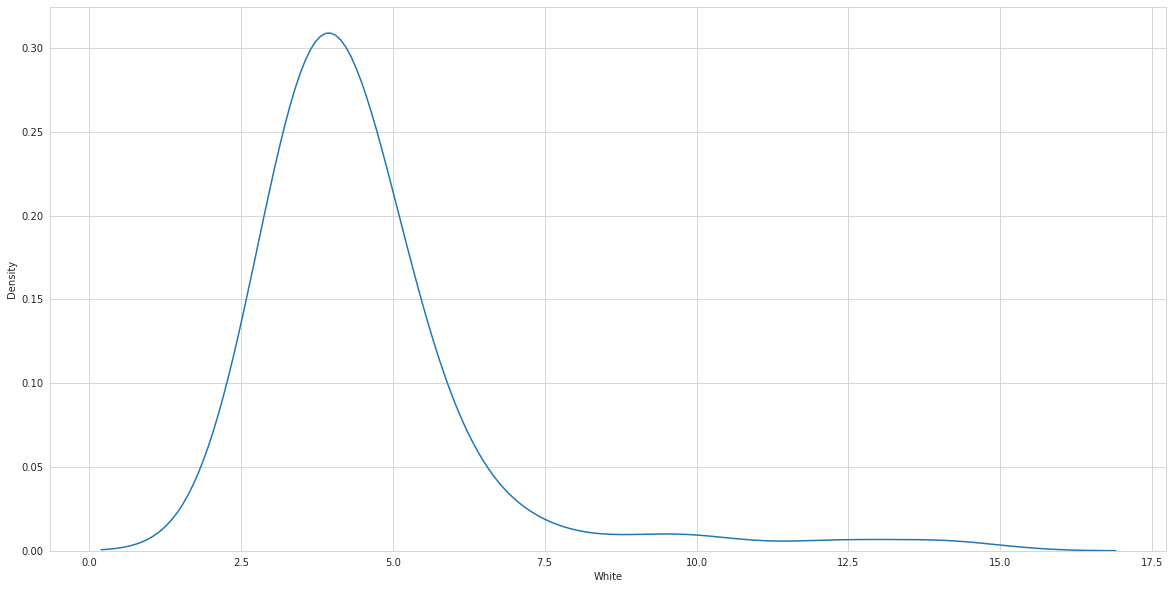

In [12]:
sns.set_style('whitegrid')
sns.kdeplot(df['White'], bw=0.5)

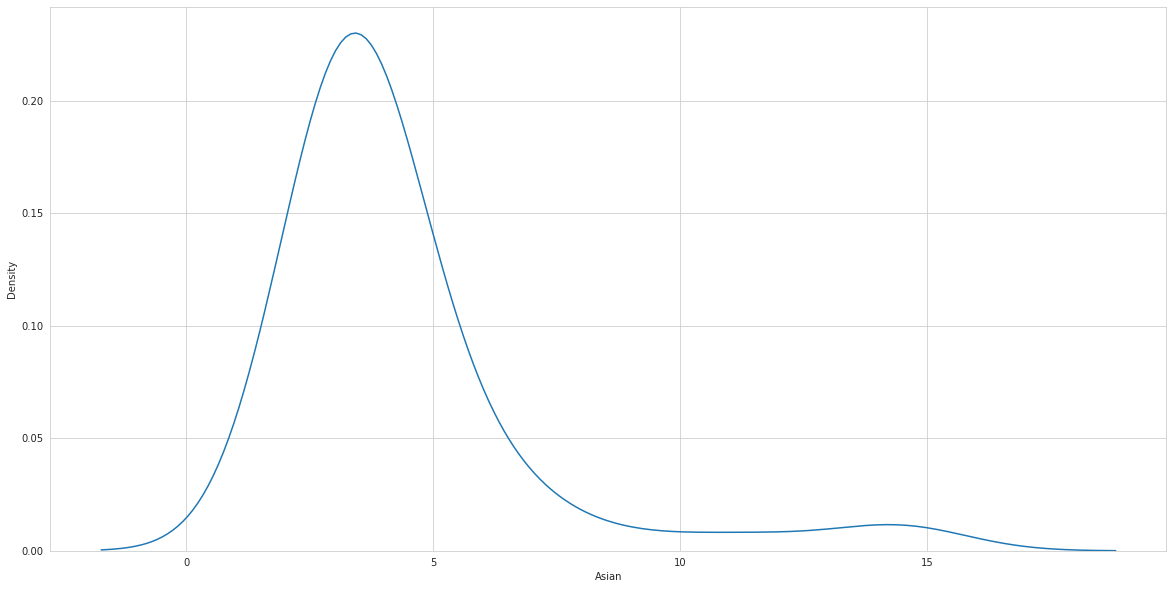

In [13]:
sns.set_style('whitegrid')
sns.kdeplot(df['Asian'], bw=0.5)

Density plot almost look same for both features. 

2. Explore Some Bivariate Relations
Use the same dataset within the same website to explore some bivariate relations (e.g. bivariate plot, correlation, table cross table etc.)


Looking at values its really difficult to say any correlation between features exist. In such case prefer to plot a HeatMap to get correlation values

In [26]:
heat_df = df.drop(columns='Date',axis=1)

In [27]:
heat_df.sample(5)

,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino,Unnamed: 9
39,4.0,3.8,3.6,13.3,3.6,6.5,2.9,4.8,NaN
63,14.8,13.1,15.5,32.1,14.1,16.7,14.5,18.9,NaN
74,6.0,5.8,5.7,13.0,5.4,9.6,6.0,7.9,NaN
72,6.3,6.0,6.0,14.8,5.7,9.2,6.6,8.6,NaN
11,5.0,4.6,4.5,16.2,4.4,8.5,4.1,6.2,NaN


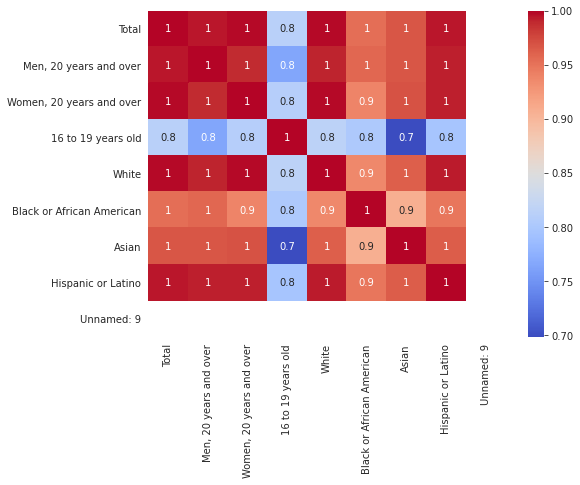

In [28]:
plt.figure(figsize=(8,6))
#sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')
sns.heatmap(heat_df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

It shows lot of correlation. Such a high corelation values are sign of something else like COVID-19 impacted everyone's employment status rather than any individual feature like White or Asian population.

I think bivariate analysis won't make more sense for this timeseries dataset.

3. Organize a Data Report
Generate a summary report. Make sure to include: summary for every variable, structure and type of data elements, discuss four results of your data.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       80 non-null     object 
 1   Total                      80 non-null     float64
 2   Men, 20 years and over     80 non-null     float64
 3   Women, 20 years and over   80 non-null     float64
 4   16 to 19 years old         80 non-null     float64
 5   White                      80 non-null     float64
 6   Black or African American  80 non-null     float64
 7   Asian                      80 non-null     float64
 8   Hispanic or Latino         80 non-null     float64
 9   Unnamed: 9                 0 non-null      float64
dtypes: float64(9), object(1)
memory usage: 6.4+ KB


The Dataset is timeseries data on unemployment status for each demographics. The dataset contains 9 features.

* Date - Represents month and year ranging from Apr-2015 to Sep-2020
* Total - Total unemployment index value of all Demographics population
* Men, 20 years and over - Unemployment index value of Men with age 20 years plus
* Women, 20 years and over  - Unemployment index value of Women age 20 years plus
* 16 to 19 years old - Unemplument index value of Men and Women included having age between 16 to 19 years
* White - Unemployment index value of white population
* Black or African American - Unemployment index value of Black/African-American population
* Asian - Unemployment index value of Asian population
* Hispanic or Latino - Unemployment index value of Hispanic or Latino poulation
* Unnamed - Unemploymment index value of All other (Unnamed) demographics population

All the features except data are having numerical values. Data type is float.

In [32]:
df.describe()

,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino,Unnamed: 9
count,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,0.0
mean,5.11,4.75,4.75,14.74,4.53,8.35,4.35,6.31,NaN
std,1.99,1.81,2.16,3.43,1.87,2.34,2.62,2.70,NaN
min,3.50,3.10,3.00,9.60,3.00,5.20,2.20,4.00,NaN
25%,3.98,3.60,3.58,12.60,3.50,6.60,3.00,4.77,NaN
50%,4.70,4.35,4.30,14.05,4.20,8.00,3.60,5.60,NaN
75%,5.40,5.10,4.90,16.00,4.70,9.33,4.10,6.73,NaN
max,14.80,13.10,15.50,32.10,14.10,16.70,14.90,18.90,NaN


Mean unemployment index value is very high for African-American i.e. 8.35 followed by for Hispanic/Latino 6.31. It means COVID-19 has impacted those 2 demographics more than White and Asians.

Also 16-19 age group population which generally enters job market at this age is having trouble finding employment.